<a href="https://colab.research.google.com/github/Bonado/APS360/blob/master/APS360_Lab_1_Bo_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from time import time
from functools import wraps
import logging

def timed(foo):
    @wraps(foo)
    def bar(*a, **kw):
        s = time()
        foo(*a, **kw)
        e = time()
        print('%f sec' % (e - s))
    return bar

@timed
def sum_of_cubes(n):
  if type(n) is not int or n < 1:
    if n < 1: 
      raise Exception('n = {} is not a valid input'.format(n))
      return -1
    elif n - int(n) == 0:
        sum = 0
        while n >= 1:
          sum += n**3
          n = n - 1
        return int(sum)
    else:     
      return -1
  else:     
    sum = 0
    while n >= 1:
      sum += n**3
      n = n - 1
  return sum

def main():
  sum_of_cubes(3)

main()

0.000004 sec


In [ ]:
def word_lengths(sentence):
  list_of_words = sentence.split()
  list_of_lengths = []
  for word in list_of_words:
     list_of_lengths.extend([len(word)])
  return list_of_lengths

In [ ]:
import numpy.matlib

def all_same_length(sentence):
  list_of_words = sentence.split()
  list_of_lengths = []
  for word in list_of_words:
    list_of_lengths.extend([len(word)])

  new_list = [list_of_lengths[0]]*len(list_of_lengths)
  print(list_of_lengths)
  print(new_list)
  if new_list == list_of_lengths:
    return True
  else:
    return False    

In [ ]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [ ]:
matrix.size #this prints = total elements in the matrix
matrix.shape
vector.size
vector.shape

(4,)

In [ ]:
import time
# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    99*99
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
diff

0.0007121562957763672

In [ ]:
class AddBias(object): #new class called Addbias and inherts from the class object
  def __init__(self,val):
    self.val = val
    
  def __call__(self, input):
    return self.val + input 

In [ ]:
add1 = AddBias(1)
add1(np.array([3,4,5]))

array([4, 5, 6])

In [ ]:
class ElementwiseMultiply:
  def __init__(self, weight):
    self.weight = weight

  def __call__(self, input):
    if input.shape == self.weight.shape:
      return np.multiply(input, self.weight)
    else:
      return None

In [ ]:
new = ElementwiseMultiply(np.array([1, 2, 3]))
print(new(np.array([2,3,4, 9])))

None


In [ ]:
class LeakyRelu:
  def __init__(self, alpha):
    self.alpha = alpha

  def __call__(self, input):
    input = np.asarray(input, dtype = np.float64)

    if input.ndim == 0:
      input = input[np.newaxis]
      print(input)

    input[input<0] = np.multiply(input[input <0], self.alpha) #multiply all element less than 0 with alpha
    
    if input.ndim == 1:
      return np.squeeze(input)

    return input

In [ ]:
leaky_relu = LeakyRelu(0.1)
print(leaky_relu(-1))
leaky_relu([[1,-1, -4, -5, 2], [4/5,-20, -44, 35, -2.39]])

[-1.]
-0.1


array([[ 1.   , -0.1  , -0.4  , -0.5  ,  2.   ],
       [ 0.8  , -2.   , -4.4  , 35.   , -0.239]])

In [ ]:
class Compose:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, Input):
      output = Input
      print(output)
      for i in range(0, len(self.layers)):
        print(output)
        output = self.layers[i](output)
      return output

In [ ]:
weight_1 = np.array([1, 2, 3, 4.])
weight_2 = np.array([-1, -2, -3, -4.])
bias_1 = 3.0
bias_2 = -2.0
alpha = 0.1

elem_mult_1 = ElementwiseMultiply(weight_1)
add_bias_1 = AddBias(bias_1)
leaky_relu = LeakyRelu(alpha)
elem_mult_2 = ElementwiseMultiply(weight_2)
add_bias_2 = AddBias(bias_2)
layers = Compose([elem_mult_1, 
                  add_bias_1, 
                  leaky_relu,
                  elem_mult_2, 
                  add_bias_2, 
                  leaky_relu])

input = np.array([10, 5, -5, -10.])
print("Input: ", input)

output = layers(input)
print("Output:", output)

Input:  [ 10.   5.  -5. -10.]
[ 10.   5.  -5. -10.]
[ 10.   5.  -5. -10.]
[ 10.  10. -15. -40.]
[ 13.  13. -12. -37.]
[13.  13.  -1.2 -3.7]
[-13.  -26.    3.6  14.8]
[-15.  -28.    1.6  12.8]
Output: [-1.5 -2.8  1.6 12.8]


(350, 210, 4)


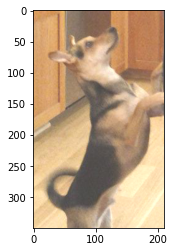

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")
print(img.shape)
plt.imshow(img)
img_add = img + 0.25
plt.imshow(np.clip(img_add, 0,1))


(130, 150, 3)


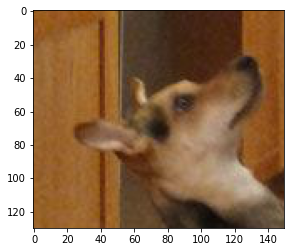

In [ ]:
img_cropped = img[:130, :150, :-1]
print(img_cropped.shape)
plt.imshow(img_cropped)

In [ ]:
import torch

In [ ]:
img_torch = torch.from_numpy(img_cropped)

In [ ]:
img_torch.shape

torch.Size([130, 150, 3])

In [ ]:
img_torch.numel()

58500

In [ ]:
print(img_torch.transpose(0,2).shape)

torch.Size([3, 150, 130])


In [ ]:
print(img_torch.shape)

torch.Size([130, 150, 3])


In [ ]:
print(img_torch.unsqueeze(0).shape)

torch.Size([1, 130, 150, 3])


In [ ]:
print(img_torch.shape)

torch.Size([130, 150, 3])


In [ ]:
print(img_torch)

tensor([[[0.5882, 0.3725, 0.1490],
         [0.5765, 0.3608, 0.1373],
         [0.5569, 0.3412, 0.1176],
         ...,
         [0.5804, 0.3412, 0.1294],
         [0.6039, 0.3647, 0.1529],
         [0.6157, 0.3765, 0.1647]],

        [[0.5412, 0.3216, 0.0902],
         [0.5647, 0.3451, 0.1137],
         [0.5961, 0.3765, 0.1451],
         ...,
         [0.5882, 0.3490, 0.1373],
         [0.6078, 0.3686, 0.1569],
         [0.6196, 0.3804, 0.1686]],

        [[0.6157, 0.3765, 0.1529],
         [0.6196, 0.3843, 0.1490],
         [0.6196, 0.3843, 0.1412],
         ...,
         [0.5922, 0.3529, 0.1373],
         [0.6157, 0.3765, 0.1608],
         [0.6275, 0.3882, 0.1725]],

        ...,

        [[0.6039, 0.3882, 0.1686],
         [0.6078, 0.3922, 0.1686],
         [0.6118, 0.3961, 0.1725],
         ...,
         [0.3804, 0.3098, 0.2157],
         [0.3765, 0.3059, 0.2118],
         [0.3765, 0.3098, 0.2078]],

        [[0.5882, 0.3725, 0.1529],
         [0.6078, 0.3922, 0.1725],
         [0.

In [ ]:
print(torch.max(img_torch, dim = 1))

torch.return_types.max(
values=tensor([[0.6941, 0.4941, 0.3490],
        [0.6902, 0.4863, 0.3451],
        [0.6902, 0.4824, 0.3451],
        [0.6902, 0.4824, 0.3412],
        [0.6667, 0.4863, 0.2980],
        [0.6706, 0.4824, 0.2980],
        [0.6667, 0.4706, 0.3059],
        [0.6627, 0.4667, 0.3137],
        [0.6627, 0.4588, 0.3216],
        [0.6824, 0.4706, 0.3255],
        [0.6824, 0.4706, 0.3216],
        [0.6745, 0.4627, 0.3255],
        [0.6745, 0.4627, 0.3882],
        [0.6745, 0.4588, 0.3686],
        [0.6784, 0.4627, 0.3490],
        [0.6784, 0.4667, 0.3412],
        [0.6784, 0.4745, 0.3333],
        [0.6824, 0.4824, 0.3333],
        [0.6824, 0.4784, 0.3373],
        [0.6824, 0.4745, 0.3294],
        [0.6863, 0.4784, 0.3137],
        [0.6784, 0.4745, 0.3294],
        [0.6706, 0.4706, 0.3373],
        [0.6706, 0.4824, 0.3412],
        [0.6784, 0.4784, 0.3294],
        [0.6824, 0.4627, 0.3294],
        [0.6784, 0.4706, 0.3294],
        [0.6784, 0.4863, 0.3216],
        [0.6863, 

In [ ]:
print(torch.max(img_torch, dim = 1)[0])

tensor([[0.6941, 0.4941, 0.3490],
        [0.6902, 0.4863, 0.3451],
        [0.6902, 0.4824, 0.3451],
        [0.6902, 0.4824, 0.3412],
        [0.6667, 0.4863, 0.2980],
        [0.6706, 0.4824, 0.2980],
        [0.6667, 0.4706, 0.3059],
        [0.6627, 0.4667, 0.3137],
        [0.6627, 0.4588, 0.3216],
        [0.6824, 0.4706, 0.3255],
        [0.6824, 0.4706, 0.3216],
        [0.6745, 0.4627, 0.3255],
        [0.6745, 0.4627, 0.3882],
        [0.6745, 0.4588, 0.3686],
        [0.6784, 0.4627, 0.3490],
        [0.6784, 0.4667, 0.3412],
        [0.6784, 0.4745, 0.3333],
        [0.6824, 0.4824, 0.3333],
        [0.6824, 0.4784, 0.3373],
        [0.6824, 0.4745, 0.3294],
        [0.6863, 0.4784, 0.3137],
        [0.6784, 0.4745, 0.3294],
        [0.6706, 0.4706, 0.3373],
        [0.6706, 0.4824, 0.3412],
        [0.6784, 0.4784, 0.3294],
        [0.6824, 0.4627, 0.3294],
        [0.6784, 0.4706, 0.3294],
        [0.6784, 0.4863, 0.3216],
        [0.6863, 0.4627, 0.3216],
        [0.698

In [ ]:
print(torch.max(torch.max(img_torch, dim = 1)[0], dim = 0))

torch.return_types.max(
values=tensor([0.8941, 0.7882, 0.6745]),
indices=tensor([95, 95, 95]))


In [ ]:
a = torch.max(torch.max(img_torch, dim = 1)[0], dim = 0)[0]
print(a)

tensor([0.8941, 0.7882, 0.6745])


In [ ]:
import numpy as np
x = np.array([[1,2], [3,4]], [5,6], [7,8]])
print(x)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [ ]:
x = torch.randn(2, 3)
print("x original value:", x)
y = torch.transpose(x, 0, 1)
print(np.may_share_memory(y, x))
print("y value:", y)
y[0][0] = 1000
print("y value:", y)
print("x changed value:", x)



x original value: tensor([[ 0.3779, -0.4290, -0.1741],
        [ 1.2199, -0.9621,  0.6821]])
True
y value: tensor([[ 0.3779,  1.2199],
        [-0.4290, -0.9621],
        [-0.1741,  0.6821]])
y value: tensor([[ 1.0000e+03,  1.2199e+00],
        [-4.2898e-01, -9.6213e-01],
        [-1.7409e-01,  6.8214e-01]])
x changed value: tensor([[ 1.0000e+03, -4.2898e-01, -1.7409e-01],
        [ 1.2199e+00, -9.6213e-01,  6.8214e-01]])
